In [8]:
%matplotlib ipympl
%load_ext autoreload
%autoreload 2

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
import numpy as np

In [10]:
file1 = '/lustre/storeB/project/fou/hi/foccus/datasets/symlinks/norkystv3-hindcast/2024/norkyst800-20240101.nc'
file2 = '/lustre/storeB/project/fou/hi/foccus/datasets/symlinks/norkystv3-hindcast/2024/norkyst800-20240730.nc' # one date in the summer and one in the winter
ds1 = xr.open_dataset(file1,drop_variables=["Uwind_eastward","Vwind_northward","ubar_eastward","vbar_northward","w","ln_AKs","hc","Cs_r","Cs_w","h","projection_stere","depth"]).isel(s_rho=0, s_w=0)
ds2 = xr.open_dataset(file2,drop_variables=["Uwind_eastward","Vwind_northward","ubar_eastward","vbar_northward","w","ln_AKs","hc","Cs_r","Cs_w","h","projection_stere","depth"]).isel(s_rho=0, s_w=0)
ds = xr.merge([ds1, ds2])
print(ds)

<xarray.Dataset> Size: 3GB
Dimensions:      (time: 48, X: 2747, Y: 1148)
Coordinates:
  * time         (time) datetime64[ns] 384B 2024-01-01 ... 2024-07-30T23:00:00
  * X            (X) float64 22kB 0.0 800.0 1.6e+03 ... 2.196e+06 2.197e+06
  * Y            (Y) float64 9kB 0.0 800.0 1.6e+03 ... 9.168e+05 9.176e+05
    s_rho        float64 8B -0.9799
    s_w          float64 8B -1.0
    lon          (Y, X) float64 25MB 8.7 8.706 8.711 8.717 ... 18.29 18.31 18.33
    lat          (Y, X) float64 25MB 54.29 54.3 54.31 ... 75.71 75.72 75.73
Data variables:
    zeta         (time, Y, X) float32 605MB nan nan nan ... -0.68 -0.68 -0.68
    u_eastward   (time, Y, X) float32 605MB 0.0 0.0 0.0 0.0 ... 0.109 0.14 0.14
    v_northward  (time, Y, X) float32 605MB 0.0 0.0 0.0 ... -0.063 -0.062 -0.062
    temperature  (time, Y, X) float32 605MB nan nan nan ... 2.375 2.376 2.366
    salinity     (time, Y, X) float32 605MB nan nan nan ... 34.73 34.73 34.73
    sea_mask     (Y, X) float32 13MB 0.0 0.0 0.

# Violin plot

In [ ]:
#Much faster to plot if I flatten it first
temp = np.array(ds.temperature).flatten()
sal = np.array(ds.salinity).flatten()
u = np.array(ds.u_eastward).flatten()
v = np.array(ds.v_northward).flatten()

In [ ]:
fig, ax = plt.subplots(3,2, figsize=(15,15))

a = sns.violinplot(data=sal, inner='box', ax=ax[0,0])
a.set_xticklabels(['Salinity'])
a = sns.violinplot(data=sal[np.where(sal > 33)], ax=ax[0,1])
a.set_xticklabels(['Salinity 33 cutoff'])
a = sns.violinplot(data=temp, inner='box', ax=ax[1,0])
a.set_xticklabels(['Temperature'])
a = sns.violinplot(data=u, inner='box', ax=ax[2,0])

a = sns.violinplot(data=v, inner='box', ax=ax[2,1])

# Subsampling the data for faster plots

In [ ]:
x_npoints = ds.X.shape[0]
y_npoints = ds.Y.shape[0]
print(x_npoints, y_npoints)

# Take a samle of the data and then make violin plots (10%) and thake every other time step
ds_sample = ds.isel(time=slice(None, None, 2),  # every other time step
                    X=np.random.choice(ds.X.size, x_npoints//10, replace=False),
                    Y=np.random.choice(ds.Y.size, y_npoints//10, replace=False))

2747 1148


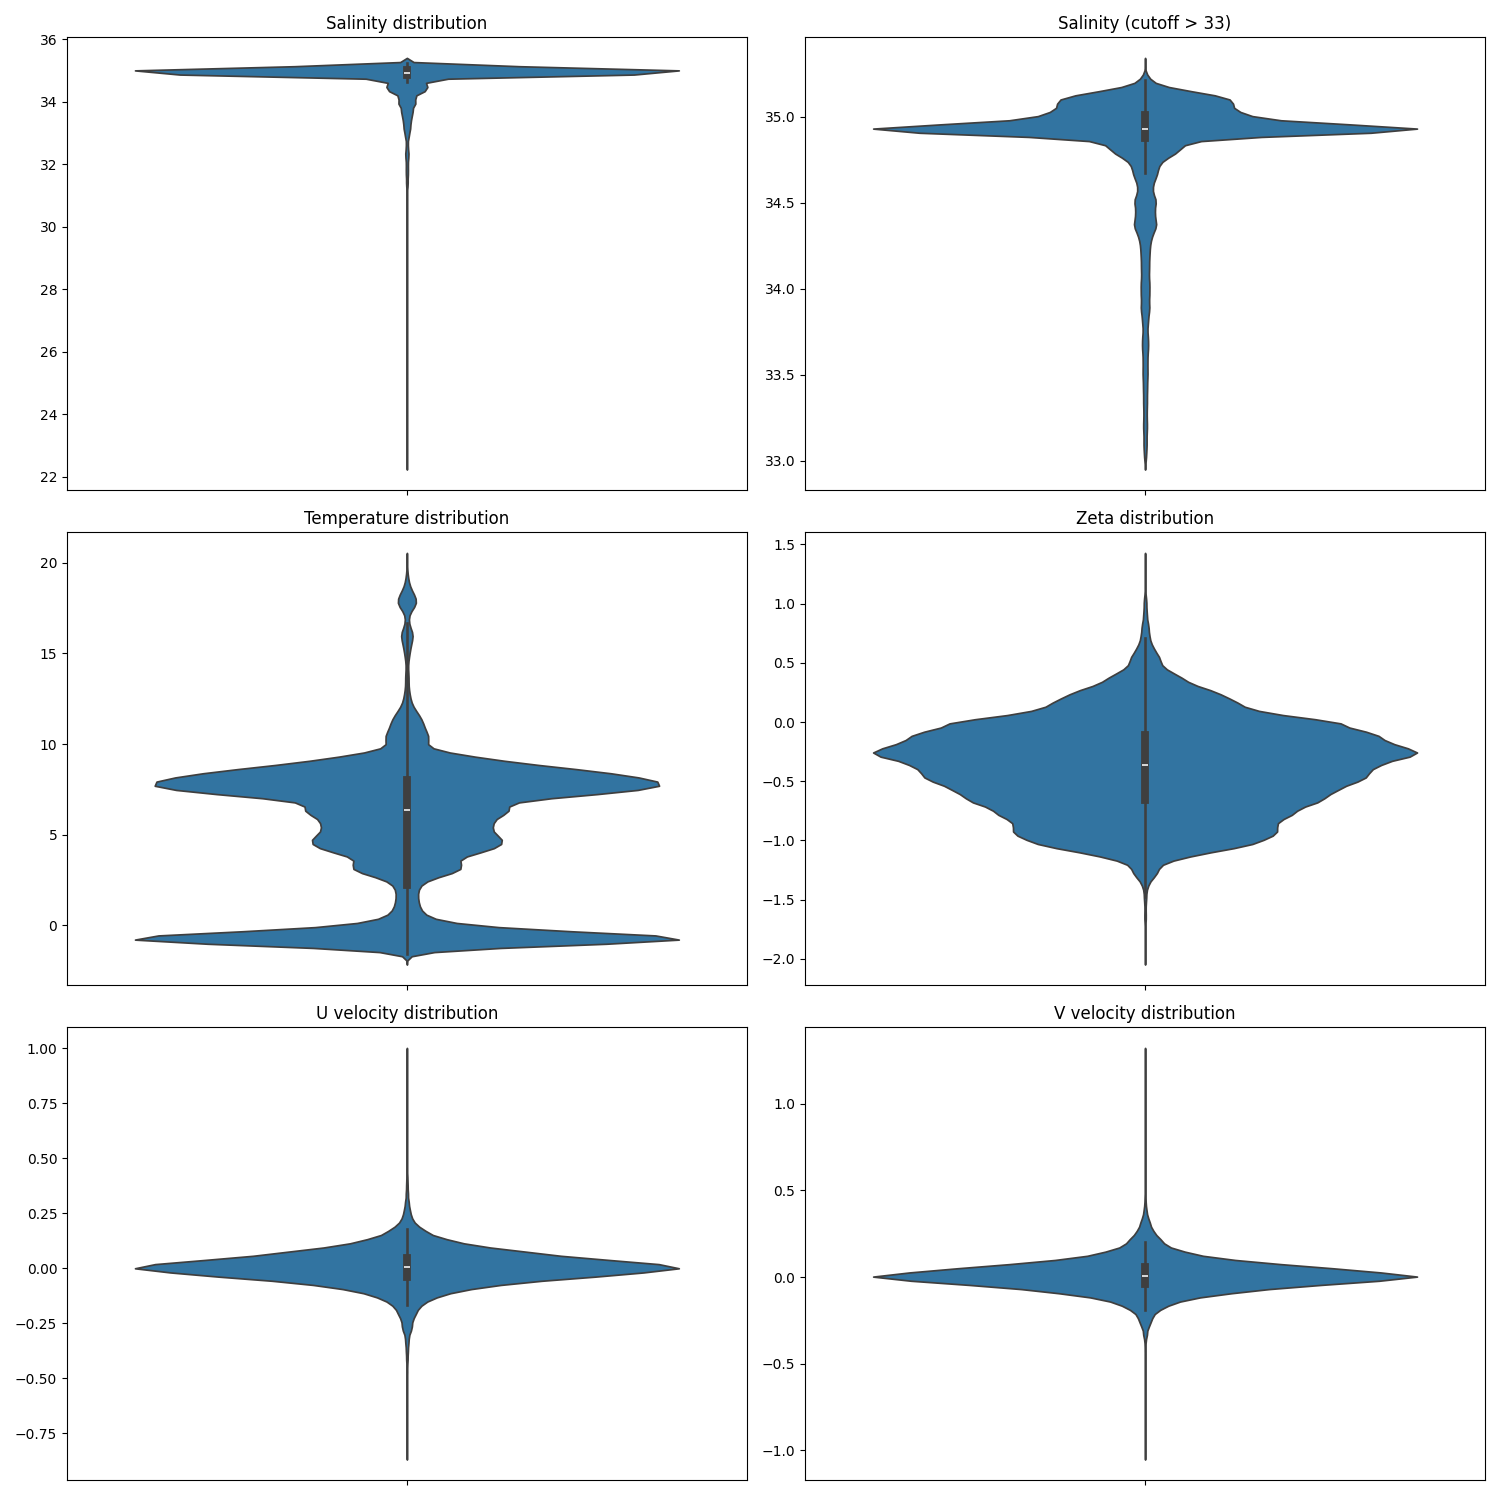

In [ ]:
"""
Violin plots of the sampled data.
flatten arrays, remove NaNs, and add titles/labels for clarity
"""
fig, ax = plt.subplots(3, 2, figsize=(15, 15))

# Helper to flatten and remove NaNs
def clean(arr):
    return arr.values.flatten()[~np.isnan(arr.values.flatten())]

sal = clean(ds_sample.salinity)
sal_cut = sal[sal > 33]
temp = clean(ds_sample.temperature)
zeta = clean(ds_sample.zeta)
u = clean(ds_sample.u_eastward)
v = clean(ds_sample.v_northward)

sns.violinplot(data=sal, inner='box', ax=ax[0,0])
ax[0,0].set_xticklabels(['Salinity'])
ax[0,0].set_title('Salinity distribution')

sns.violinplot(data=sal_cut, inner='box', ax=ax[0,1])
ax[0,1].set_xticklabels(['Salinity > 33'])
ax[0,1].set_title('Salinity (cutoff > 33)')

sns.violinplot(data=temp, inner='box', ax=ax[1,0])
ax[1,0].set_xticklabels(['Temperature'])
ax[1,0].set_title('Temperature distribution')

sns.violinplot(data=zeta, inner='box', ax=ax[1,1])
ax[1,1].set_xticklabels(['Zeta'])
ax[1,1].set_title('Zeta distribution')

sns.violinplot(data=u, inner='box', ax=ax[2,0])
ax[2,0].set_xticklabels(['U velocity'])
ax[2,0].set_title('U velocity distribution')

sns.violinplot(data=v, inner='box', ax=ax[2,1])
ax[2,1].set_xticklabels(['V velocity'])
ax[2,1].set_title('V velocity distribution')

plt.tight_layout()

### Mask out values over land 
and make the same plots

In [12]:
# mask out values over land
ds = ds.where(ds.sea_mask == 1)

# then select the same subset of data as before
ds_sample = ds.isel(time=slice(None, None, 2),  # every other time step
                    X=np.random.choice(ds.X.size, x_npoints//10, replace=False),
                    Y=np.random.choice(ds.Y.size, y_npoints//10, replace=False))

/tmp/ipykernel_3264163/3779300491.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,0].set_xticklabels(['Salinity'])
/tmp/ipykernel_3264163/3779300491.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,1].set_xticklabels(['Salinity > 33'])
/tmp/ipykernel_3264163/3779300491.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,1].set_xticklabels(['Salinity > 33'])
/tmp/ipykernel_3264163/3779300491.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,0].set_xticklabels(['Temperature'])
/tmp/ipykernel_3264163/3779300491.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or usin

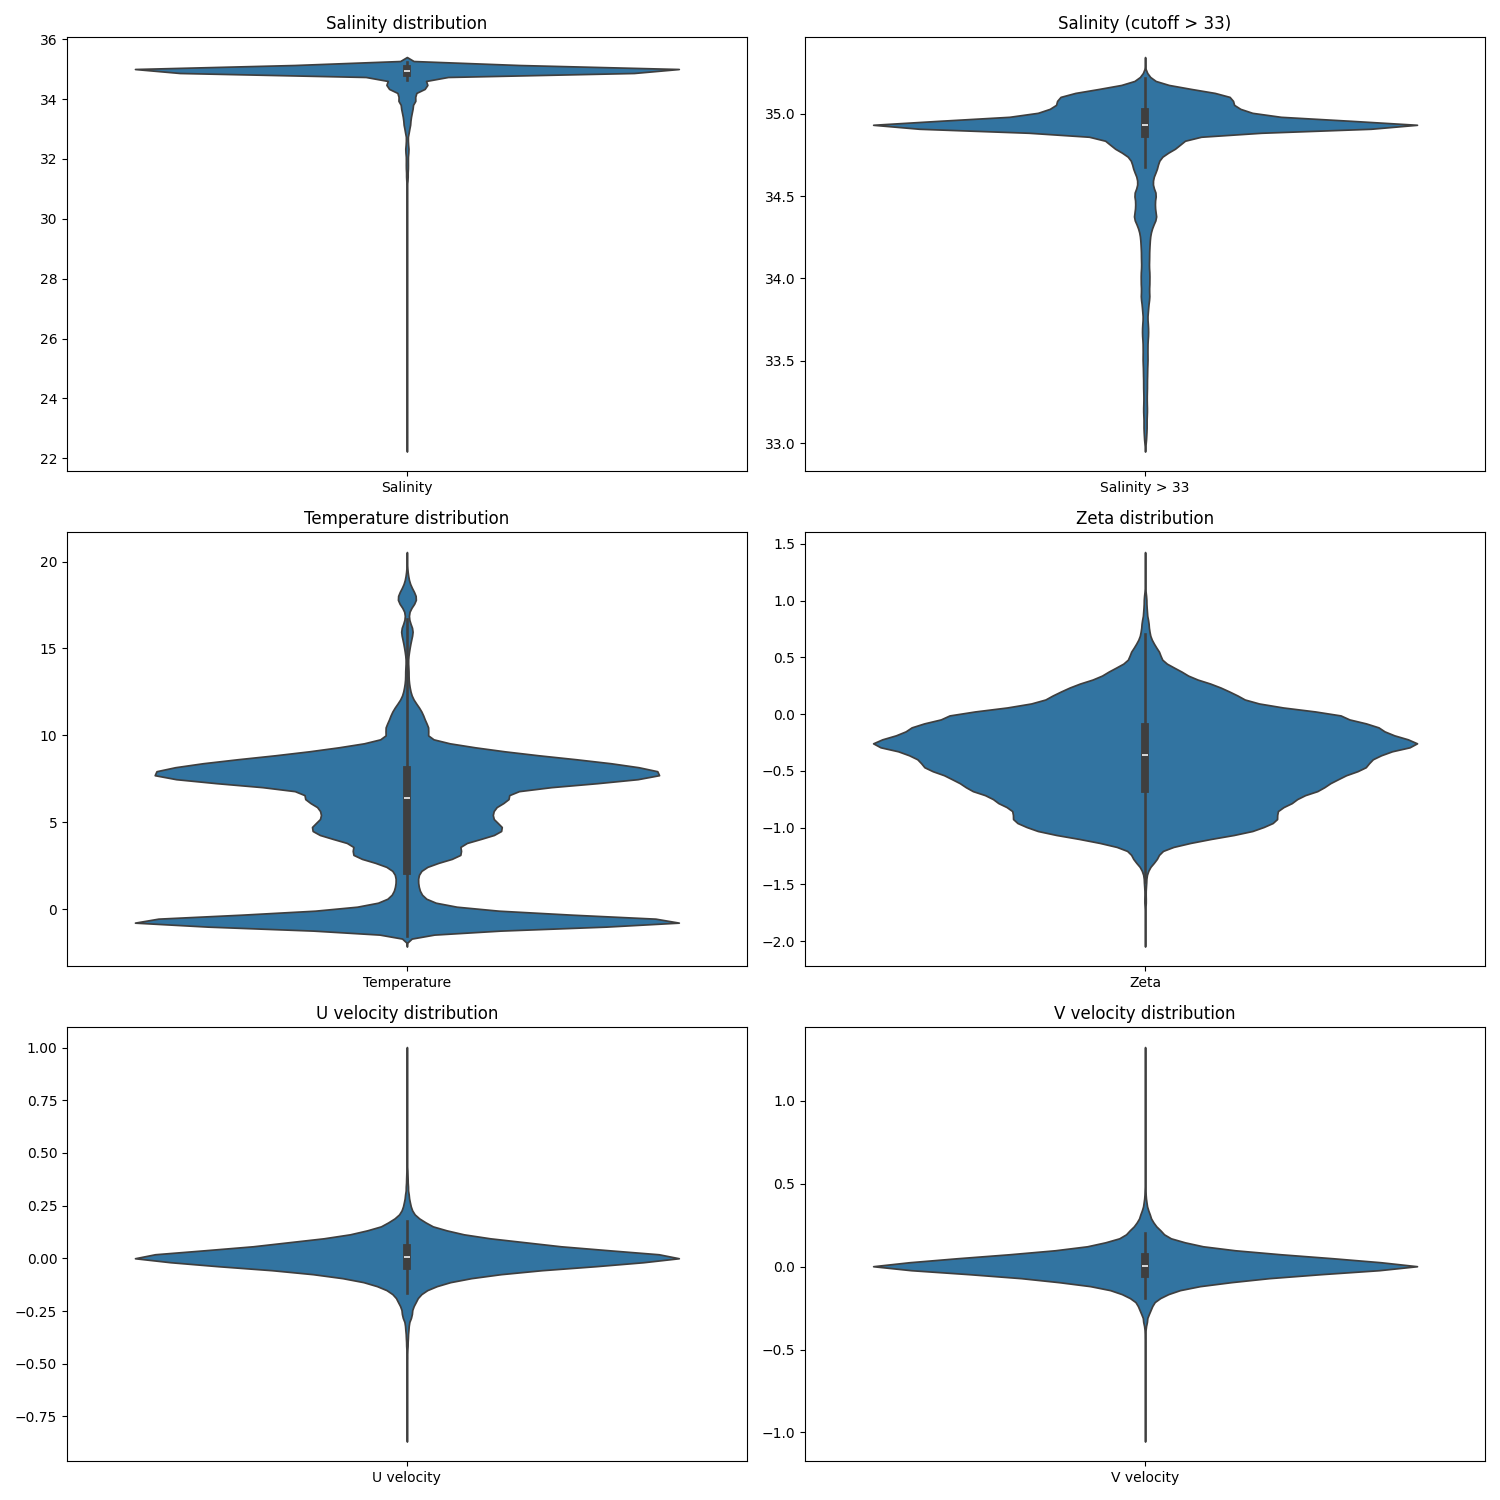

In [28]:
# same violin plots as before, but now with the sea mask applied

fig, ax = plt.subplots(3, 2, figsize=(15, 15))

sal = clean(ds_sample.salinity)
sal_cut = sal[sal > 33]
temp = clean(ds_sample.temperature)
zeta = clean(ds_sample.zeta)
u = clean(ds_sample.u_eastward)
v = clean(ds_sample.v_northward)

sns.violinplot(data=sal, inner='box', ax=ax[0,0])
ax[0,0].set_xticklabels(['Salinity'])
ax[0,0].set_title('Salinity distribution')

sns.violinplot(data=sal_cut, inner='box', ax=ax[0,1])
ax[0,1].set_xticklabels(['Salinity > 33'])
ax[0,1].set_title('Salinity (cutoff > 33)')

sns.violinplot(data=temp, inner='box', ax=ax[1,0])
ax[1,0].set_xticklabels(['Temperature'])
ax[1,0].set_title('Temperature distribution')

sns.violinplot(data=zeta, inner='box', ax=ax[1,1])
ax[1,1].set_xticklabels(['Zeta'])
ax[1,1].set_title('Zeta distribution')

sns.violinplot(data=u, inner='box', ax=ax[2,0])
ax[2,0].set_xticklabels(['U velocity'])
ax[2,0].set_title('U velocity distribution')

sns.violinplot(data=v, inner='box', ax=ax[2,1])
ax[2,1].set_xticklabels(['V velocity'])
ax[2,1].set_title('V velocity distribution')

plt.tight_layout()

# Plotting Normalizations

In [29]:
# normalize the data with min-max, max, mean-std and std scaling
def min_max_scale(arr):
    return (arr - arr.min()) / (arr.max() - arr.min())

def max_scale(arr):
    return arr / arr.max()

def mean_std_scale(arr):
    return (arr - arr.mean()) / arr.std()

def std_scale(arr):
    return arr / arr.std()


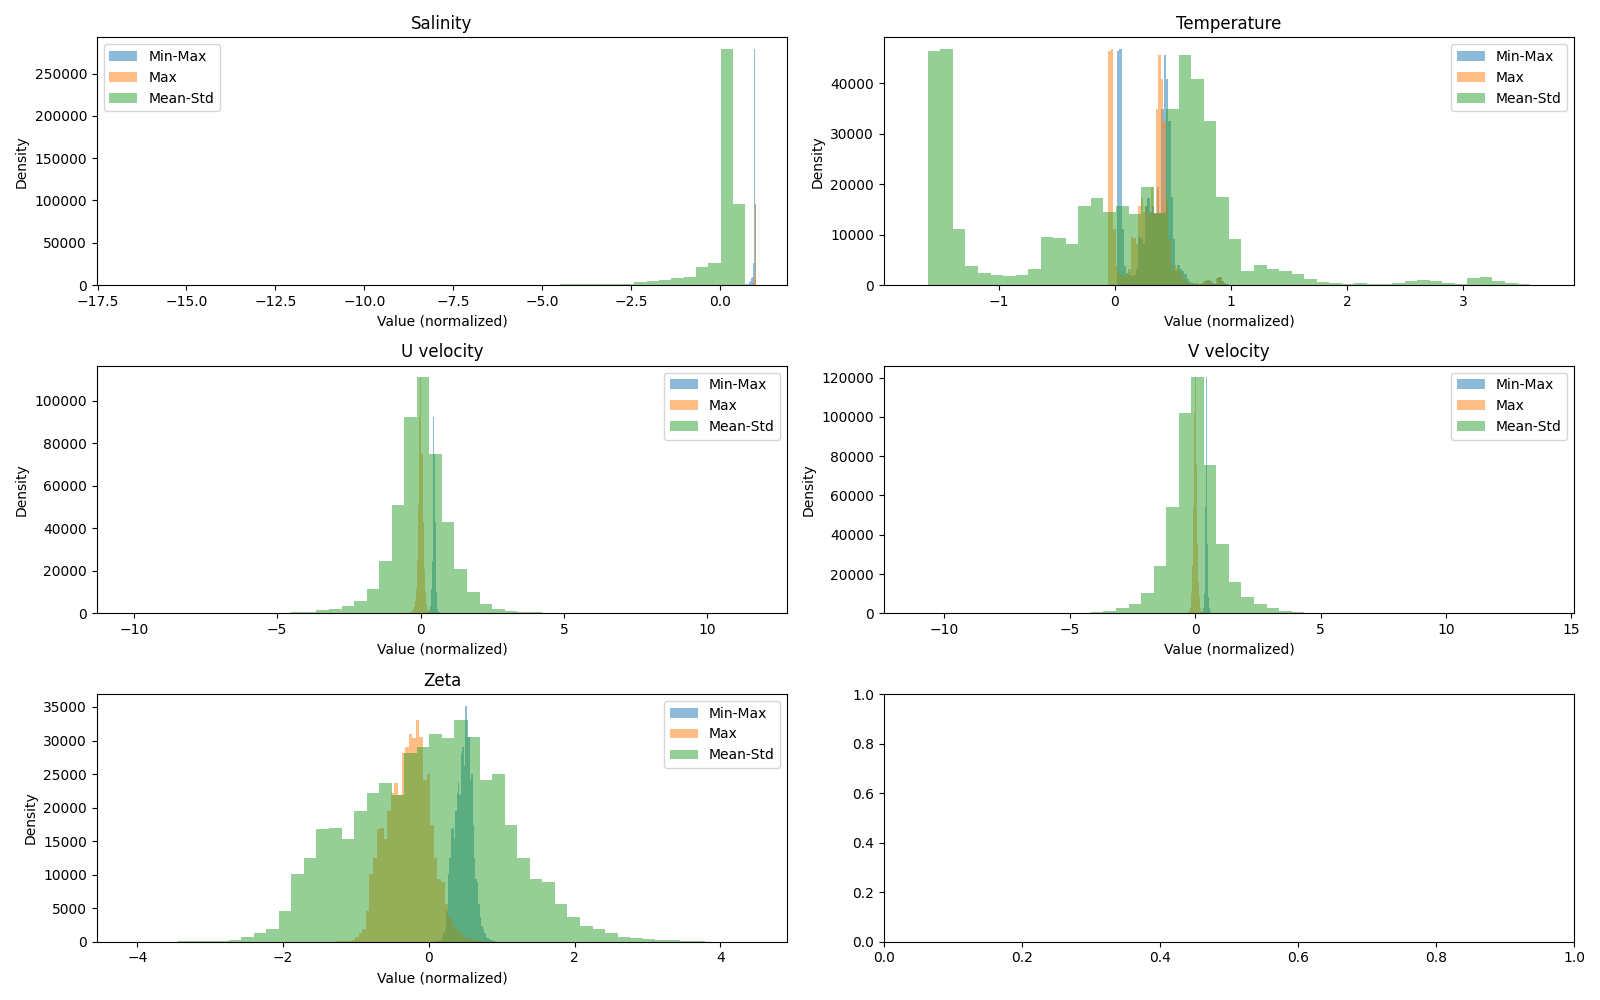

In [33]:
# Visualize the effect of different normalization methods on each variable using histograms
variables = {
    'Salinity': sal,
    'Temperature': temp,
    'U velocity': u,
    'V velocity': v,
    'Zeta': zeta
}

scalings = {
    'Min-Max': min_max_scale,
    'Max': max_scale,
    'Mean-Std': mean_std_scale,
    #'Std': std_scale #this one looks awful for all except velocity
}

fig, axes = plt.subplots(3, 2, figsize=(16, 10))
axes = axes.flatten()

for idx, (var_name, var_data) in enumerate(variables.items()):
    ax = axes[idx]
    for scale_name, scale_func in scalings.items():
        scaled = scale_func(var_data)
        #nbins = int(np.sqrt(len(var_data)))  # Use square root rule for number of bins
        #ax.hist(scaled, bins=nbins, alpha=0.5, label=scale_name)
        ax.hist(scaled, bins=50, alpha=0.5, label=scale_name)
    ax.set_title(var_name)
    ax.legend()
    ax.set_ylabel('Density')
    ax.set_xlabel('Value (normalized)')

plt.tight_layout()

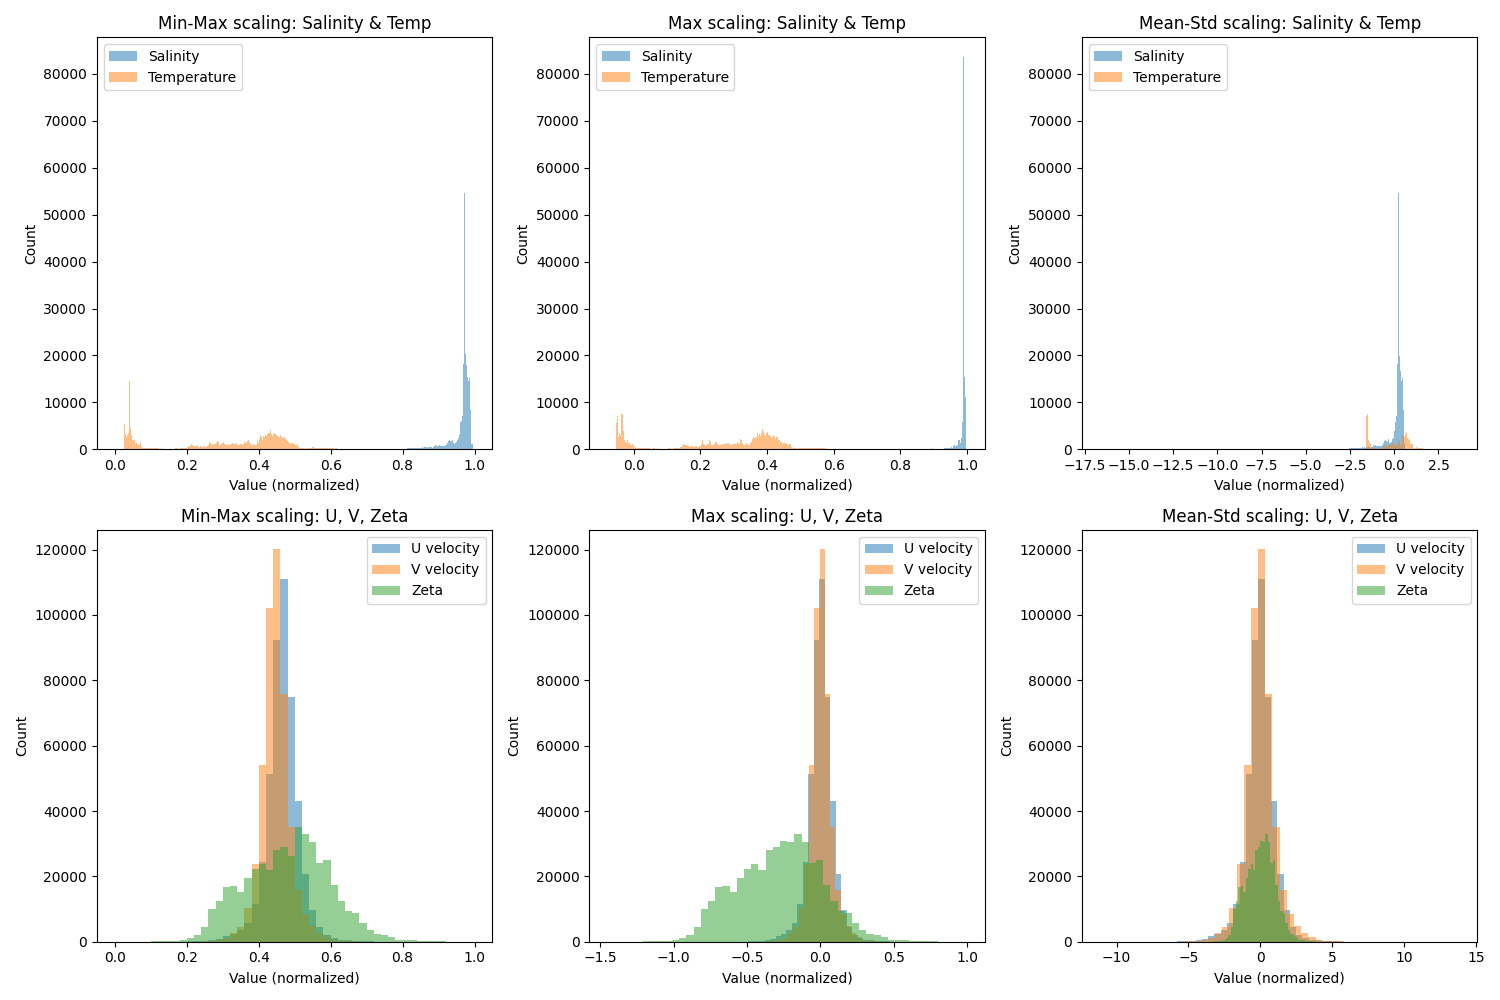

In [39]:
# For each normalization method, plot salinity+temperature and u+v+zeta together in separate rows
sal_temp = {'Salinity': sal, 'Temperature': temp}
uvz = {'U velocity': u, 'V velocity': v, 'Zeta': zeta}

fig, axes = plt.subplots(2, len(scalings), figsize=(5 * len(scalings), 10))
if len(scalings) == 1:
    axes = np.array([[axes[0]], [axes[1]]])

for idx, (scale_name, scale_func) in enumerate(scalings.items()):
    # First row: salinity and temperature
    ax1 = axes[0, idx]
    for var_name, var_data in sal_temp.items():
        scaled = scale_func(var_data)
        nbins = int(np.sqrt(len(var_data)))
        ax1.hist(scaled, bins=nbins, alpha=0.5, label=var_name)
    ax1.set_title(f'{scale_name} scaling: Salinity & Temp')
    ax1.legend()
    ax1.set_ylabel('Count')
    ax1.set_xlabel('Value (normalized)')

    # Second row: u, v, zeta
    ax2 = axes[1, idx]
    for var_name, var_data in uvz.items():
        scaled = scale_func(var_data)
        ax2.hist(scaled, bins=50, alpha=0.5, label=var_name)
    ax2.set_title(f'{scale_name} scaling: U, V, Zeta')
    ax2.legend()
    ax2.set_ylabel('Count')
    ax2.set_xlabel('Value (normalized)')

plt.tight_layout()